## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
a = pd.read_csv('customer_churn.csv')
a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Missing value analysis

a.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 1. Data Manipulation

**● Extract the 5th column and store it in ‘customer_5’**

In [5]:
a['customer_5']=a.iloc[:,4]
a['customer_5']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: customer_5, Length: 7043, dtype: object

**● Extract the 15th column and store it in ‘customer_15’**

In [6]:
a['customer_15']=a.iloc[:,14]
a['customer_15']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: customer_15, Length: 7043, dtype: object

**● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’**

In [7]:
senior_male_electronic=a[(a['gender']=='Male') & (a['SeniorCitizen']==1) & (a['PaymentMethod']=='Electronic check')]
senior_male_electronic.T

,20,55,57,78,91,129,168,214,245,247,...,6717,6773,6809,6819,6836,6837,6894,6914,6967,7032
customerID,8779-QRDMV,1658-BYGOY,5067-XJQFU,0191-ZHSKZ,2424-WVHPL,2639-UGMAZ,3445-HXXGF,2504-DSHIH,0221-WMXNQ,9947-OTFQU,...,3768-NLUBH,3990-QYKBE,9274-CNFMO,3005-NFMTA,5868-YWPDW,6229-LSCKB,1400-MMYXY,7142-HVGBG,8739-WWKDU,6894-LFHLY
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
SeniorCitizen,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Partner,No,No,Yes,No,No,No,Yes,Yes,No,No,...,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No
Dependents,No,No,Yes,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
tenure,1,18,66,30,1,71,58,23,4,15,...,57,37,4,55,6,6,3,43,25,1
PhoneService,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,Yes,Yes,No,No,No phone service,No phone service,Yes,No,No,...,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes
InternetService,DSL,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,...,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,No,No,Yes,No,Yes,No,No,Yes,No,...,No,No,No,Yes,No,No,No,No,No,No


**● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’**

In [8]:
customer_total_tenure = a[(a['tenure'] > 70) | (a['MonthlyCharges'] > 100)]
customer_total_tenure.T

,8,12,13,14,15,17,28,30,35,38,...,6992,7002,7006,7007,7022,7023,7034,7037,7039,7042
customerID,7892-POOKP,8091-TTVAX,0280-XJGEX,5129-JLPIS,3655-SNQYZ,9959-WOFKT,5248-YGIJN,3841-NFECX,6234-RAAPL,5380-WJKOV,...,0218-QNVAS,9586-JGQKH,0093-XWZFY,2274-XUATA,7203-OYKCT,1035-IPQPU,0639-TSIQW,2569-WGERO,2234-XADUH,3186-AJIEK
gender,Female,Male,Male,Male,Female,Male,Male,Female,Female,Male,...,Male,Female,Male,Male,Male,Female,Female,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
Partner,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No
Dependents,No,No,No,No,Yes,Yes,No,No,Yes,No,...,Yes,No,No,No,No,No,No,No,Yes,No
tenure,28,58,49,25,69,71,72,71,72,34,...,71,64,40,72,72,63,67,72,72,66
PhoneService,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No phone service,Yes,Yes,Yes,No,Yes,No
InternetService,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,Fiber optic,Fiber optic,...,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,Fiber optic,Fiber optic,No,Fiber optic,Fiber optic
OnlineSecurity,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,...,No,No,No,Yes,No,No,Yes,No internet service,No,Yes


**● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’**

In [9]:
two_mail_yes=a[(a['Contract']=='Two year') & (a['PaymentMethod']=='Mailed check') & (a['Churn']=='Yes')]
two_mail_yes.T

,268,5947,6680
customerID,6323-AYBRX,7951-QKZPL,9412-ARGBX
gender,Male,Female,Female
SeniorCitizen,0,0,0
Partner,No,Yes,No
Dependents,No,Yes,Yes
tenure,59,33,48
PhoneService,Yes,Yes,Yes
MultipleLines,No,Yes,No
InternetService,No,No,Fiber optic
OnlineSecurity,No internet service,No internet service,No


**● Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’**

In [10]:
customer_333 = a.sample(333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
3077,7284-ZZLOH,Male,0,Yes,No,45,Yes,No,DSL,Yes,...,No,No,Two year,No,Credit card (automatic),53.30,2296.25,No,No,No
2254,7322-OCWHC,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,No,No,Two year,Yes,Bank transfer (automatic),93.05,6735.05,No,No,No
1222,9091-WTUUY,Male,0,Yes,Yes,64,Yes,No,DSL,Yes,...,Yes,No,Two year,No,Mailed check,69.25,4447.75,No,Yes,No
4538,0378-TOVMS,Female,0,No,No,3,Yes,No,Fiber optic,No,...,No,Yes,Month-to-month,No,Electronic check,85.80,272.2,Yes,No,Yes
4378,6980-CDGFC,Female,0,Yes,No,67,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.85,1327.4,No,No,No internet service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,5201-CBWYG,Male,0,Yes,Yes,62,Yes,Yes,No,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),24.80,1476.25,No,Yes,No internet service
1341,9269-CQOOL,Male,0,No,Yes,3,Yes,No,DSL,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),54.70,169.45,Yes,Yes,No
6304,2754-XBHTB,Female,0,No,No,9,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),77.65,714.15,Yes,No,No
1466,8205-MQUGY,Male,0,Yes,Yes,12,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,49.20,571.15,No,Yes,No


**● Get the count of different levels from the ‘Churn’ column**

In [11]:
a['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 2. Data Visualization:

**● Build a bar-plot for the ’InternetService’ column:**

a. Set x-axis label to ‘Categories of Internet Service’

b. Set y-axis label to ‘Count of Categories’

c. Set the title of plot to be ‘Distribution of Internet Service’

d. Set the color of the bars to be orange

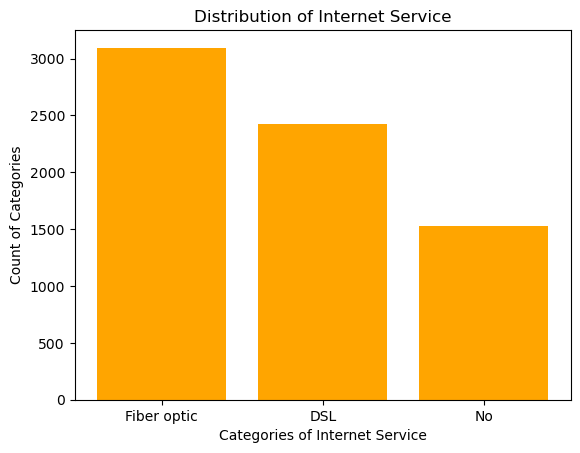

In [12]:
x = a['InternetService'].value_counts().keys().tolist()
y = a['InternetService'].value_counts().tolist()
plt.bar(x, y, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

**● Build a histogram for the ‘tenure’ column:**

a. Set the number of bins to be 30

b. Set the color of the bins to be ‘green’

c. Assign the title ‘Distribution of tenure’

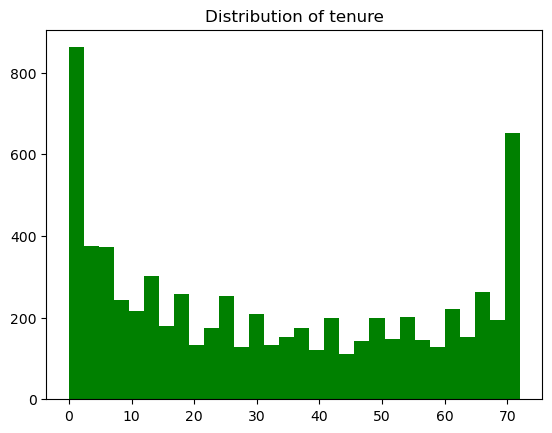

In [13]:
x = a['tenure']
plt.hist(x, bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

**● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:**

a. Assign the points a color of ‘brown’

b. Set the x-axis label to ‘Tenure of customer’

c. Set the y-axis label to ‘Monthly Charges of customer’

d. Set the title to ‘Tenure vs Monthly Charges’

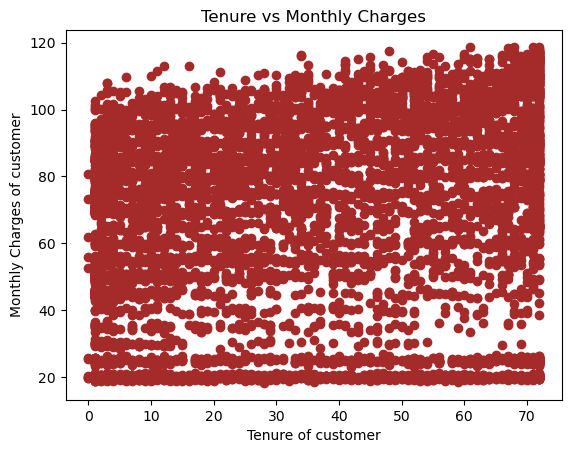

In [14]:
x = a['tenure']
y = a['MonthlyCharges']
plt.scatter(x,y, color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &

f. ‘Contract’ on the x-axis.

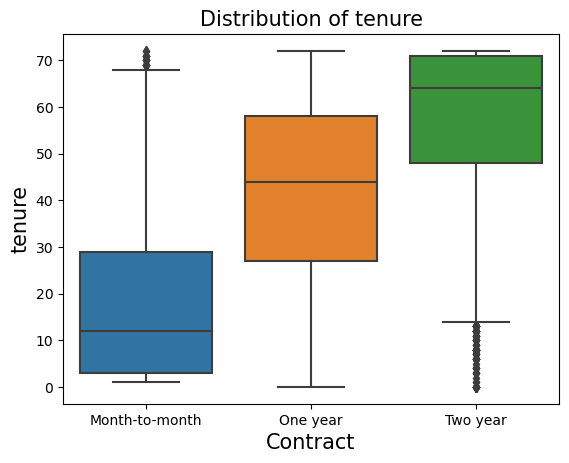

In [15]:
sns.boxplot(x=a['Contract'], y=a['tenure'])        # or sns.boxplot(x='Contract', y='tenure', data=a)
plt.xlabel('Contract', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.title('Distribution of tenure', fontsize=15)
plt.show()

# 3. Linear Regression

**● Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:**

a. Divide the dataset into train and test sets in 70:30 ratio.

b. Build the model on train set and predict the values on test set

c. After predicting the values, find the root mean square error

d. Find out the error in prediction & store the result in ‘error’

e. Find the root mean square error

In [16]:
X = np.array(a['MonthlyCharges']).reshape(-1,1)
y = np.array(a['tenure']).reshape(-1,1)

In [17]:
# Dividing the dataset into train and test sets in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=2)

In [18]:
# Building model on train set

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the value on test set

y_predict = model.predict(X_test)

In [20]:
# Finding mean squared error

mse = mean_squared_error(y_test, y_predict)
mse

549.7531488719915

In [21]:
# Finding error in prediction/rmse & store the result in ‘error’

error = (np.sqrt(mse))
error

23.446815324729954

# 4. Logistic Regression 

**● Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:**

a. Divide the dataset in 65:35 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and get the accuracy score

In [22]:
X = np.array(a['MonthlyCharges']).reshape(-1,1)
y = np.array(a['Churn']).reshape(-1,1)

In [23]:
# Dividing the dataset in 65:35 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=2)

In [24]:
# Building the model on train set

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predicting the values on test set

y_predict = model.predict(X_test)

In [26]:
# Building confusion matrix

confusion_matrix(y_test, y_predict)

array([[1832,    0],
       [ 634,    0]], dtype=int64)

In [27]:
# Finding the accuracy score

accuracy_score(y_test, y_predict)

0.7429034874290349

d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’

e. Divide the dataset in 80:20 ratio
    
f. Build the model on train set and predict the values on test set

g. Build the confusion

In [28]:
X = np.array(a[['tenure','MonthlyCharges']])
y = np.array(a['Churn'])

In [29]:
# Dividing the dataset in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2)

In [30]:
# Building the model on train set

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predict the values on test set

y_predict = model.predict(X_test)

In [32]:
# Building confusion matrix

confusion_matrix(y_test, y_predict)

array([[964,  97],
       [197, 151]], dtype=int64)

In [33]:
# Finding the accuracy score

accuracy_score(y_test, y_predict)

0.7913413768630234

# 5. Decision Tree:

**● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:**

a. Divide the dataset in 80:20 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy

In [34]:
X = np.array(a['tenure']).reshape(-1,1)
y = np.array(a['Churn']).reshape(-1,1)

In [35]:
# Dividing the dataset in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20, random_state = 2)

In [36]:
# Building the model

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# Predicting the values on test set

y_predict = tree.predict(X_test)

In [38]:
# Building the confusion matrix

confusion_matrix(y_test, y_predict)

array([[965,  96],
       [240, 108]], dtype=int64)

In [39]:
# Calculate the accuracy

accuracy_score(y_test, y_predict)

0.7615330021291696

# 6. Random Forest:

**● Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:**

a. Divide the dataset in 70:30 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy

In [40]:
X = np.array(a[['tenure','MonthlyCharges']])
y = np.array(a['Churn']).reshape(-1,1)

In [41]:
# Dividing the dataset in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [42]:
# Building the model

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Predicting the value on test set

y_predict = forest.predict(X_test)

In [44]:
# Building the confusion matrix

confusion_matrix(y_test, y_predict)

array([[1366,  203],
       [ 298,  246]], dtype=int64)

In [45]:
# Calculate the accuracy score

accuracy_score(y_test, y_predict)

0.7628963558920966